# Lab 4

Ganti constant `STATIC` menjadi path ke gambar-gambar yang akan digunakan dan `OUT` menjadi path ke output directory. Contoh jika gambar ada di directory yang sama dengan script ini, maka value nya menjadi `"."`. Library yang dibutuhkan untuk menjalankan script ini adalah sebagai berikut: `scikit-image`, `matplotlib`, `numpy`, dan `ipympl`. Cara menjalankan scriptnya sama seperti menjalankan notebook biasa.

In [1]:
import functools, os
from pathlib import Path

SUB = "lab4"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import filters, io, morphology

# %matplotlib widget

In [3]:
def help_fig(col, row, titles, images, dpi=100.0):
    fig, axs = plt.subplots(col, row, dpi=dpi)
    if col > 1 or row > 1:
        for i, ax in enumerate(axs.flatten()):
            ax.set_title(titles[i])
            ax.imshow(images[i], cmap="gray")
            ax.set_axis_off()
    else:
        axs.set_title(titles[0])
        axs.imshow(images[0], cmap="gray")
        axs.set_axis_off()
    fig.tight_layout()
    plt.show()

## X-ray

In [4]:
xray = io.imread(os.path.join(STATIC, "noisy_xray.jpg"))

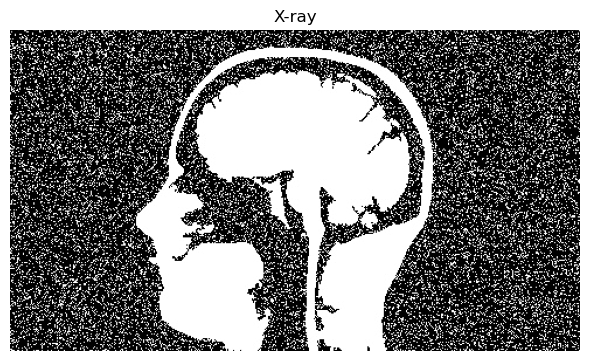

In [5]:
help_fig(1, 1, ["X-ray"], [xray])

### Cleaning the noise

In [6]:
xray_clean_square = morphology.opening(xray, morphology.square(3))
xray_clean_disk = morphology.opening(xray, morphology.disk(2))

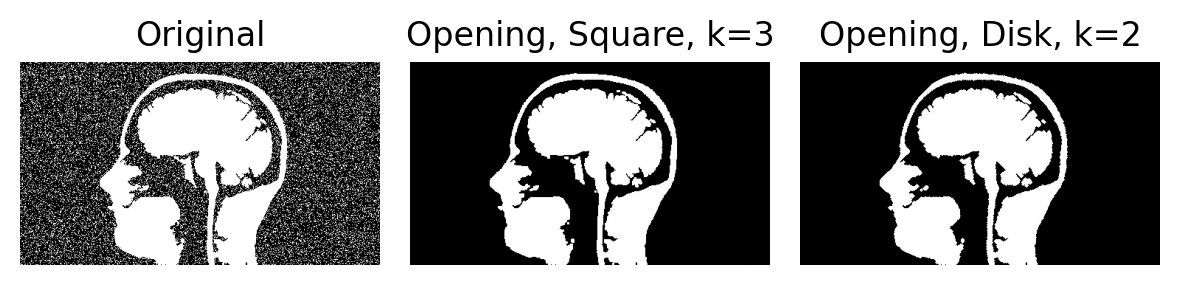

In [7]:
help_fig(1, 3, ["Original", "Opening, Square, k=3", "Opening, Disk, k=2"], [xray, xray_clean_square, xray_clean_disk], 200)

### Reasoning

Saya memilih opening morphological operator karena sifat dari noise dan juga cara opening operator bekerja. Sifat dari noise di gambar xray ini adalah bintik-bintik putih dengan background hitam. Cara opening opartor bekerja adalah melakukan erosi kepada gambar awal, yang menyebabkan bintik-bintik noise ini hilang, tapi akan membuat objek yang asli juga mengecil. Setelah melakukan erosi, akan dilakukan dilasi untuk memulihkan objek yang kita inginkan.

Setelah mencoba beberapa bentuk strel, strel square dapat membersihkan noise dari gambar tanpa menghilangkan terlalu banyak detail. Contohnya di bagian pituitary gland, untuk menghilangkan semua noise, strel disk membutuhkan ukurang kernel sebesar 2, dimana strel square membutuhkan ukuran kernel 3. Tetapi, detail objek utamanya lebih dapat dipertahankan oleh strel square dibanding strel disk.

### VS Mean and Median Filter

In [8]:
xray_clean_mean = filters.rank.mean(xray, selem=morphology.square(9))
xray_clean_median = filters.rank.median(xray, selem=morphology.square(7))

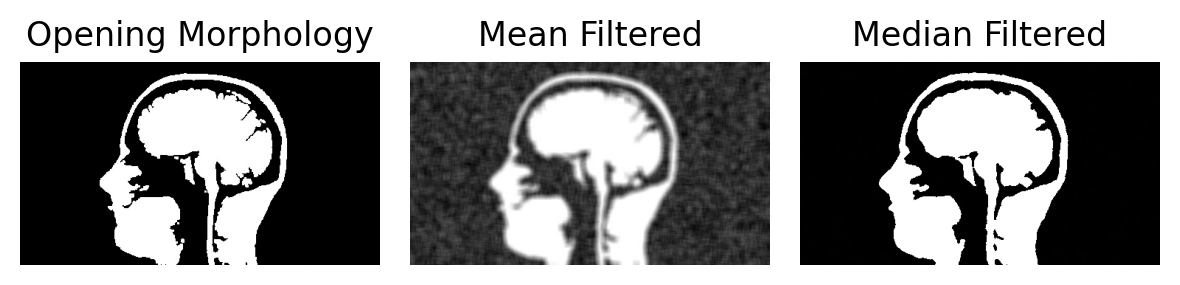

In [9]:
help_fig(1, 3, ["Opening Morphology", "Mean Filtered", "Median Filtered"], [xray_clean_square, xray_clean_mean, xray_clean_median], 200)

Untuk refresher, mean filter bekerja dengan cara mencari nilai average dari neighboring pixel, sedangkan median filter bekerja dengan cara mencari nilai tengah dari neighboring pixel.

Kita bisa lihat di hasil mean filter diatas bahwa gambarnya sekarang sangat blurry dan noise nya pun masih ada. Hal ini karena sifat dari gambar yang sifatnya pure hitam putih, sehingga hasil dari average nya akan selalu berupa shades of grey. Sebesar apapun kernel nya, hasil dari filter tidak akan pernah jelas dan akan selalu menghancurkan gambar.

Median filterakhirnya bisa menghilangkan noise dengan kernel sebesar 7. Karena median mengambil nilai tengah, maka hasil dari filter tergantung pixel mana yang sekarang paling banyak di suatu area. Tapi, efek samping dari menggunakan kernel yang besar adalah banyak detail yang hilang, terutama di lekukan otak nya.

## Secret Message

In [10]:
msg1 = io.imread(os.path.join(STATIC, "misteri1.jpg"))
msg2 = io.imread(os.path.join(STATIC, "misteri2.jpg"))

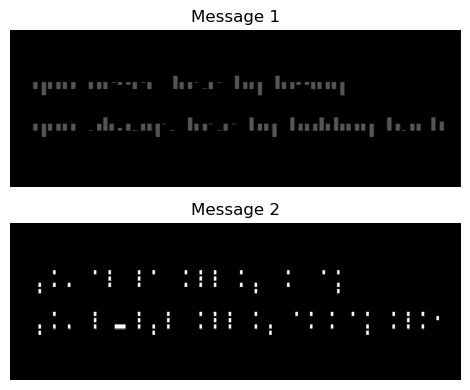

In [11]:
help_fig(2, 1, ["Message 1", "Message 2"], [msg1, msg2])

### Dilation

In [12]:
STREL_PAIRS = [
    [morphology.diamond(25), morphology.diamond(17)],
    [morphology.rectangle(12, 25), morphology.rectangle(20, 10)],
    [morphology.rectangle(46, 1), morphology.rectangle(1, 44)],
    [morphology.disk(13), morphology.disk(19)]
]

msg1_dilated = morphology.dilation(msg1, STREL_PAIRS[2][0])
msg2_dilated = morphology.dilation(msg2, STREL_PAIRS[2][1])

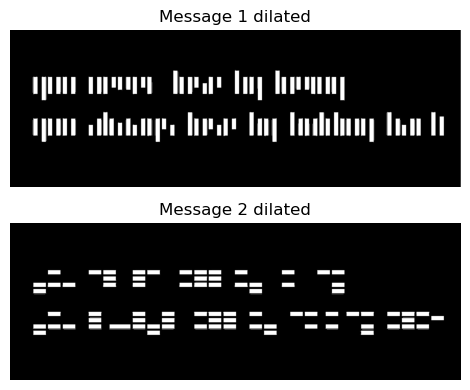

In [13]:
help_fig(2, 1, ["Message 1 dilated", "Message 2 dilated"], [msg1_dilated, msg2_dilated])

### Combine

In [14]:
message = np.add(msg1_dilated, msg2_dilated)

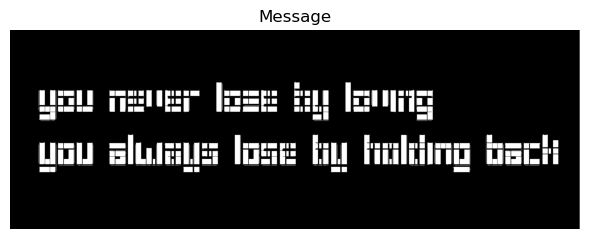

In [15]:
help_fig(1, 1, ["Message"], [message])

### The message

> you never lose by loving
>
> you always lose by holding back